<a href="https://colab.research.google.com/github/iremgngr/Machine_Learning/blob/main/Linear_regression_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

df = pd.read_csv("student.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
#df["Marks"].iat[0]

array([19.202,  7.734, 13.811, 53.018, 55.299, 17.822, 29.889, 17.264,
       20.348, 30.862, 42.036, 12.132, 24.318, 17.672, 11.397, 19.466,
       30.548, 38.49 , 50.986, 25.133, 22.073, 35.939, 12.209, 28.043,
       16.517,  6.623, 12.647, 26.532,  9.333,  8.837, 24.172,  8.1  ,
       15.038, 39.965, 17.171, 43.978, 13.119, 46.453, 41.358, 51.142,
        7.336, 15.725, 19.771, 10.429,  9.742,  8.924, 16.703, 22.701,
       26.882, 19.106, 40.602, 22.184,  7.892, 36.653, 53.158, 18.238,
       53.359, 51.583, 31.236, 51.343, 10.522, 10.844, 19.59 , 21.379,
       12.591, 13.562, 27.569,  6.185,  8.92 , 21.4  , 16.606, 13.416,
       20.398,  7.014, 39.952,  6.217, 36.746, 38.278, 49.544,  6.349,
       54.321, 17.705, 44.099, 16.106, 16.461, 39.957, 23.149,  6.053,
       11.253, 40.024, 24.394, 19.564, 23.916, 42.426, 24.451, 19.128,
        5.609, 41.444, 12.027, 32.357])

In [ ]:
y = df["Marks"].values  #Converts to numpy array format
X = df["time_study"].values
print(X[:5])

[4.508 0.096 3.133 7.909 7.811]


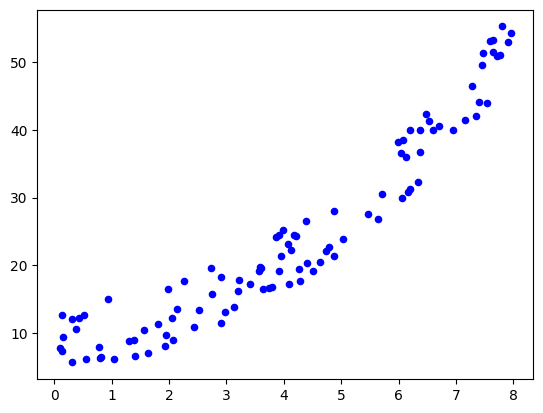

In [ ]:
plt.scatter(X, y, c="blue", s=20)
plt.show()

In [ ]:
def standardize(X):
    return (X - X.mean()) / X.std()

X = standardize(X)

In [ ]:
#The parameters were given random initial values.
beta0 = np.random.rand()
beta1 = np.random.rand()

#learning rate
alpha = 0.00001

In [ ]:
def predict(X, beta0, beta1):   #y=b0+b1*x
    return beta0 + beta1*X

In [ ]:
def sse(y, ypred):
    return np.sum((y-ypred)**2)

In [ ]:
def rmse(y, ypred):
    return np.sqrt(np.mean((y - ypred) ** 2))

In [ ]:
def gradient(y, ypred, X):
    grad_beta0 = np.sum(y - ypred)
    grad_beta1 = np.sum((y - ypred) * X)
    return grad_beta0, grad_beta1

In [ ]:
def update(beta0, beta1, grad_beta0, grad_beta1, alpha):
    beta0_new = beta0 - alpha * grad_beta0
    beta1_new = beta1 - alpha * grad_beta1
    return beta0_new, beta1_new

In [ ]:
num = 1000
threshold = 0.1
RMSE_list = []
ypred_list = []
for i in range(num):
    ypred = predict(X, beta0, beta1)
    L = rmse(y, ypred)  # SSE yerine RMSE kullanıyoruz
    RMSE_list.append(L)

    if L < threshold:
        print(f"RMSE: {L}")
        break

    grad_beta0, grad_beta1 = gradient(y, ypred, X)
    beta0, beta1 = update(beta0, beta1, grad_beta0, grad_beta1, alpha)
    ypred_list.append(ypred)
    print(f"Iteration {i+1}: RMSE={L}")

Iteration 1: RMSE=4.777212835061116
Iteration 2: RMSE=4.777219690071118
Iteration 3: RMSE=4.77722655878813
Iteration 4: RMSE=4.777233441239539
Iteration 5: RMSE=4.777240337452787
Iteration 6: RMSE=4.777247247455374
Iteration 7: RMSE=4.777254171274853
Iteration 8: RMSE=4.777261108938826
Iteration 9: RMSE=4.777268060474961
Iteration 10: RMSE=4.777275025910975
Iteration 11: RMSE=4.777282005274639
Iteration 12: RMSE=4.777288998593783
Iteration 13: RMSE=4.77729600589629
Iteration 14: RMSE=4.777303027210101
Iteration 15: RMSE=4.777310062563211
Iteration 16: RMSE=4.7773171119836695
Iteration 17: RMSE=4.777324175499585
Iteration 18: RMSE=4.777331253139121
Iteration 19: RMSE=4.777338344930497
Iteration 20: RMSE=4.777345450901989
Iteration 21: RMSE=4.777352571081926
Iteration 22: RMSE=4.777359705498702
Iteration 23: RMSE=4.777366854180759
Iteration 24: RMSE=4.7773740171566
Iteration 25: RMSE=4.777381194454782
Iteration 26: RMSE=4.777388386103923
Iteration 27: RMSE=4.777395592132696
Iteration 28:

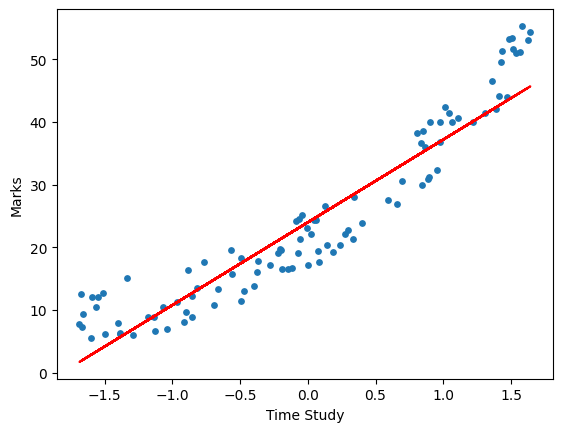

In [ ]:
plt.scatter(X, y, s=15)
plt.plot(X, ypred_list[-1], color='r')
plt.xlabel("Time Study")
plt.ylabel("Marks")
plt.show()

In [ ]:
def r2(y, ypred):                       #Used as performance criteria
    sse = np.sum((y - ypred) ** 2)
    sst = np.sum((y - y.mean()) ** 2)   #Sum Square Total
    return 1 - (sse / sst)

In [ ]:
final_rmse = RMSE_list[-1]
final_r2 = r2(y, ypred_list[-1])

print(f"Final RMSE: {final_rmse}")
print(f"Final R2: {final_r2}")

Final RMSE: 4.79897507623042
Final R2: 0.8866556539138459
